# Introduction

Keras: It is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano.It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.


<b> How keras came into being and how did it become a part of tensorflow ?</b><br>
<ul>
<li> April 2009 Theano 0.1 is released. It would dominate the deep learning framework scene for many many years.
    <br><br>
<li> June 2015 Keras is created by François Chollet. The goal was to c reate an abstraction layer to make Theano easier to use, enabling fast prototyping.
    <br><br>
<li>August 2015 Google hires François Chollet.
    <br><br>
<li>November 2015 Tensorflow is released by Google, with much inspiration from Theano and its declarative computational graph paradigm.
    <br><br>
<li>December 2015 Keras is refactored to allow for pluggable backend engines, and now it offers backend implementations for Theano and Tensorflow.
</ul>

Time passes by and the overlap between Tensorflow and Keras grows. Tensorflow ends up duplicating many of the functionalities in Keras (apart from the multiple APIs within Tensorflow that also had big overlaps).

<ul>
<li>September 2017 Theano is discontinued.
<br><br>
<li>November 2017 Keras is bundled with Tensorflow as tf.keras. 
</ul>
From this point on there are 2 different Keras: the one bundled with Tensorflow and the one that supports multiple backend engines. Both are maintained by the same people and are kept in sync.
<ul>
<li>November 2018 some crucial functionalities of Tensorflow are to be moved to tf.keras, generating a heated debate
<br><br>
<li>September 2019 Keras 2.3 is announced to be the last release of the multi-backend version of Keras
</ul>




<h2> Installation</h2>

The keras we are going to talk about is part of tensorflow and thus we only need to install tensorflow and we would get everything we need to build a machine learning model.

After you have setup python using Anaconda or by itslef, write these lines in your terminal/cmd.

    pip install --upgrade pip<br>
    pip install tensorflow
    
Now you are ready to develop machine learning models using keras. The best way to learn is using some examples. Keras has a lot of components like datasets, layers, optimizers and anythniig else you might need.

One can find all the information about different components and how to use them in the documetation. Links is below:

https://www.tensorflow.org/api_docs/python/tf/keras

This is best learnt by example which will let you see how different components are used and how we can use them.

<h3> 1. Let's start with a basic dataset Fashion MNIST</h3>

This is the Hello, World" of machine learning programs for computer vision. Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow.

Import required libraries:

In [31]:
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# you can check your tensorflow version using this

print(tf.__version__)



1.14.0


Import and load the Fashion MNIST data directly from TensorFlow:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


Loading the dataset returns four NumPy arrays:

<ul><li>The train_images and train_labels arrays are the training set—the data the model uses to learn.
    <li>The model is tested against the test set, the test_images, and test_labels arrays.
</ul>
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.


Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:


In [4]:
train_images.shape


(60000, 28, 28)

Each label is an integer between 0 and 9:

In [5]:
train_labels


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [6]:
test_images.shape

(10000, 28, 28)

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

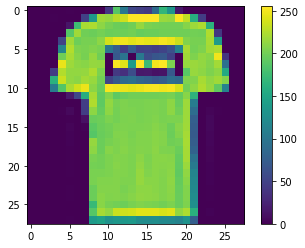

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

<b>What is the purpose of this ? </b>

Consider how a neural network learns its weights. C(NN)s learn by continually adding gradient error vectors (multiplied by a learning rate) computed from backpropagation to various weight matrices throughout the network as training examples are passed through.

The thing to notice here is the "multiplied by a learning rate".

If we didn't scale our input training vectors, the ranges of our distributions of feature values would likely be different for each feature, and thus the learning rate would cause corrections in each dimension that would differ (proportionally speaking) from one another. We might be over compensating a correction in one weight dimension while undercompensating in another.

This is non-ideal as we might find ourselves in a oscillating (unable to center onto a better maxima in cost(weights) space) state or in a slow moving (traveling too slow to get to a better maxima) state.

It is of course possible to have a per-weight learning rate, but it's yet more hyperparameters to introduce into an already complicated network that we'd also have to optimize to find. Generally learning rates are scalars.

Thus we try to normalize images before using them as input into NN (or any gradient based) algorithm. 


In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0


To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

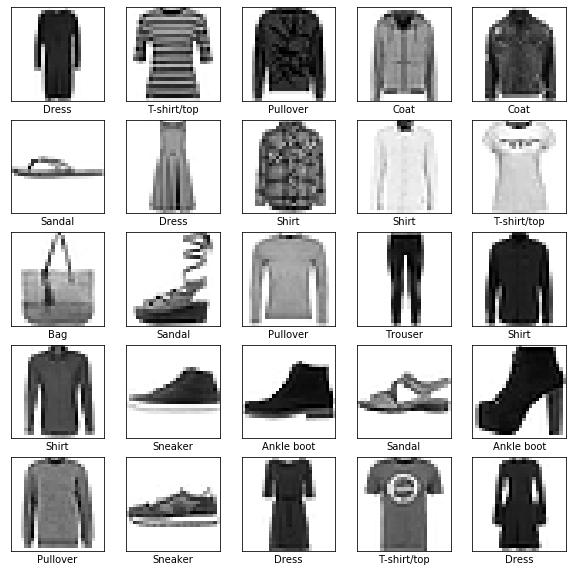

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+25], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i+25]])
plt.show()


Building the neural network requires configuring the layers of the model, then compiling the model.

The basic building block of a neural network is the layer. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

In [10]:
# we need to reshape the train and test images to pass it to CNN

train_images = train_images.reshape(60000,28,28,1)
test_images = test_images.reshape(10000,28,28,1)

# This is to stop model from training based on some condition

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epochs,logs={}):
        if logs.get('acc')>0.95:
            print("\nReached 99.8% accuracy so cancelling training!")
            self.model.stop_training = True
            
callback = myCallback()

# Defining the training model architecture

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    
    tf.keras.layers.MaxPooling2D(2,2), # Pooling allows you to reduce the feature size. 
                                     # Here it takes only the max value among the 4 pixels from the 2x2 filter
    
    tf.keras.layers.Flatten(),  # Convert the feature from multidimensional to a single dimensional array
    
    tf.keras.layers.Dense(128, activation='relu'), # Type of activation function that turns negative values to 0
   
    tf.keras.layers.Dense(10, activation='softmax') # This would convert the predicted label into probabilities 
                                                    # of ending in each class

])

# compiling the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
        train_images,train_labels,epochs=20,callbacks=[callback]
    )

print(history.epoch, history.history['acc'][-1])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/20
60000/60000 [==============================] - 28s 466us/sample - loss: 0.3947 - acc: 0.8598
Epoch 2/20
60000/60000 [==============================] - 29s 487us/sample - loss: 0.2677 - acc: 0.9027
Epoch 3/20
60000/60000 [==============================] - 30s 506us/sample - loss: 0.2247 - acc: 0.9162
Epoch 4/20
60000/60000 [==============================] - 30s 502us/sample - loss: 0.1930 - acc: 0.9279
Epoch 5/20
60000/60000 [==============================] - 30s 507us/sample - loss: 0.1658 - acc: 0.9380
Epoch 6/20
60000/60000 [==============================] - 31s 510us/sample - loss: 0.1404 - acc: 0.9475
Epoch 7/20
59968/60000 [============================>.] - ETA: 0s - loss: 0.1212 - acc: 0.9544
Reached 99.8% accuracy so cancelling training!
60000/60000 [==============================] - 29s 491us/sample - loss: 0.1213 - acc: 0.9544
[0, 1, 2, 3, 4, 5, 6] 0

<b>Evaluate Accuracy</b><br>
Next, compare how the model performs on the test dataset:


In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


10000/10000 - 2s - loss: 0.2917 - acc: 0.9079

Test accuracy: 0.9079


It turns out that the accuracy on the test dataset is less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

In [12]:
predictions = model.predict(test_images)
predictions[0]


array([2.5298024e-07, 2.5511190e-10, 6.5547846e-07, 3.1014682e-09,
       6.6854682e-09, 1.0903059e-06, 3.6664186e-08, 5.6576038e-05,
       7.7204959e-08, 9.9994123e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing.You can see which label has the highest confidence value:

In [13]:
np.argmax(predictions[0])


9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:



In [14]:
test_labels[0]


9

In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

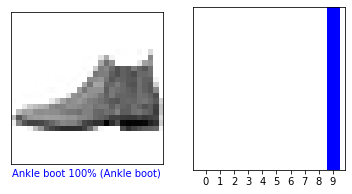

In [16]:
test_images = test_images.reshape(10000,28,28)
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


And the model predicts a label as expected.

<h3> 2. Content Based Image Retrieval Using a Convolutional Denoising Autoencoder</h3>

Hopefully the above tutorial would have given you a bried insight into how to manage images and train models using different components of keras such as layers,optimizers,callback,activation functions. 


This is inspired from a medium post which I will be sharin a link to at the end of this spotlight. I found this to be interesting and wanted to try this out and share it with everyone as this is an IR application.

link : https://medium.com/sicara/keras-tutorial-content-based-image-retrieval-convolutional-denoising-autoencoder-dc91450cc511

Now we can perform some IR related application as the title suggests.
Content based image retrieval (CBIR) systems enable to find similar images to a query image among an image dataset. The most famous CBIR system is the search per image feature of Google search. 


The steps we will be following are as follows, we first extract features from an image database and store it. Then we compute the features associated with a query image. Finally we retrieve images with the closest features. This is the high level of what we need to do.


<b>Denoising autoencoder</b>

A denoising autoencoder is a feed forward neural network that learns to denoise images. By doing so the neural network learns interesting features on the images used to train it. Then it can be used to extract features from similar images to the training set.

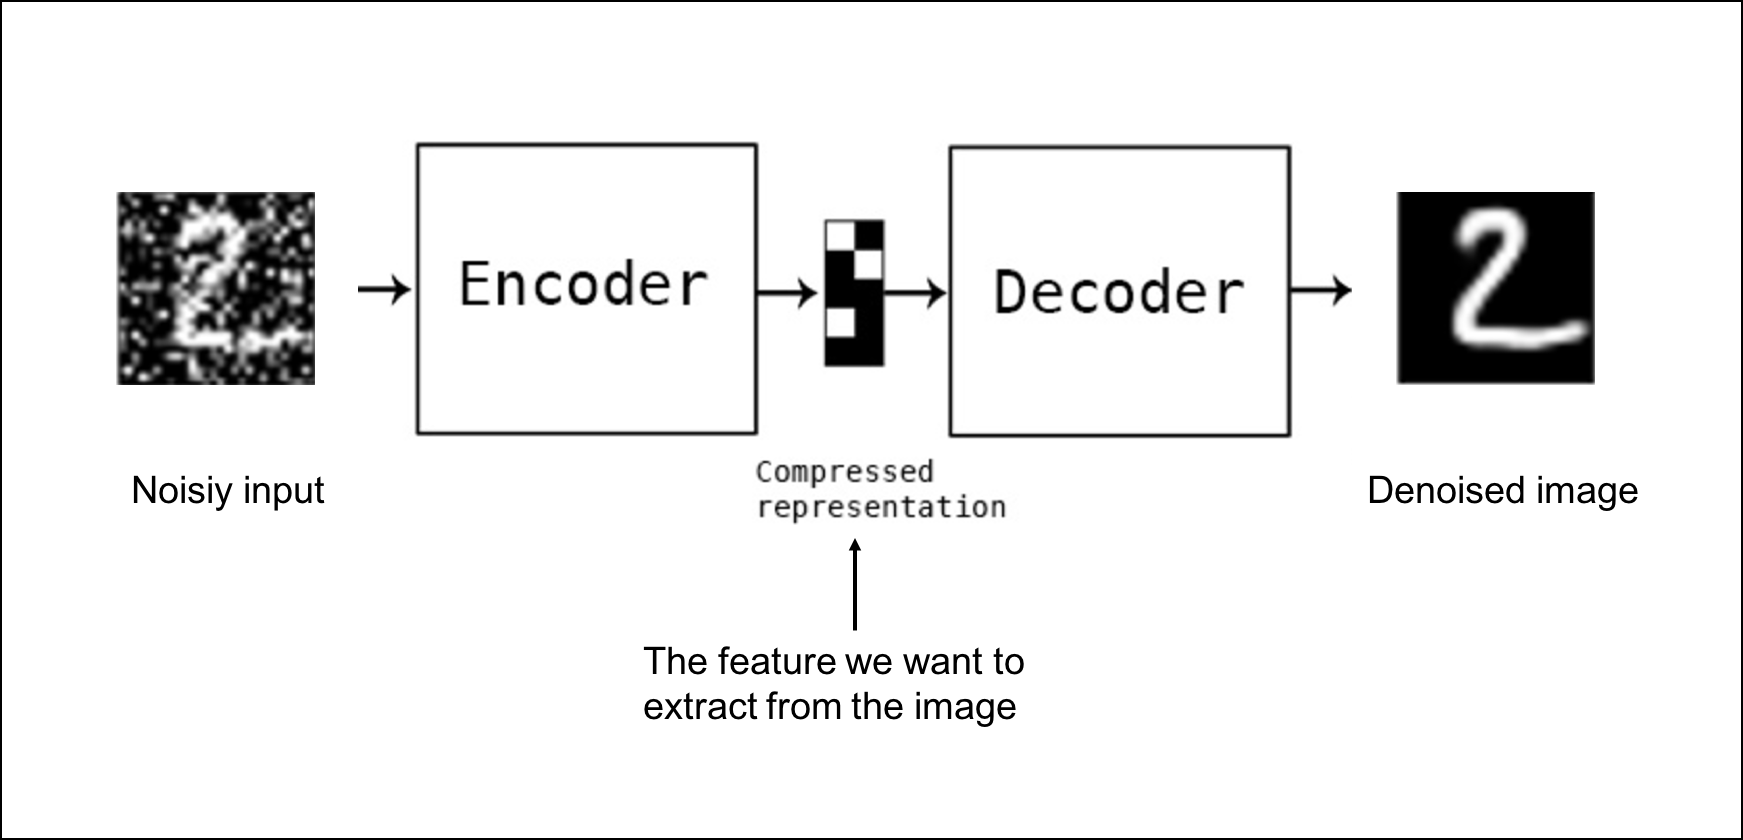

<b> Training the model</b>

We first import necessary libraries

In [1]:
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.models import Model
from keras.callbacks import TensorBoard
from keras.datasets import fashion_mnist
import numpy as np
import cv2
from keras.models import load_model
from sklearn.metrics import label_ranking_average_precision_score
import time
import matplotlib.pyplot as plt

Using TensorFlow backend.
/home/purav/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/purav/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/purav/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/purav/anaconda3/lib/python3.7/site-packages/tensorflo

Loading the data and pre processing it to match the required input shape and generating some noisy data

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  


# generating data for training 
# By applying a gaussian noise matrix and clip the images between 0 and 1.
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [9]:
def train_model():
    
#   Adding layers for a convolution encoder

    input_img = Input(shape=(28, 28, 1))
    x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)

    #     We set a name to the encoder layer in order to be able to access it.
    encoded = MaxPooling2D((2, 2), padding='same', name='encoder')(x)

    # at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
    # Upsampling layer for 2D inputs. Repeats the rows and columns of the data by size[0] and size[1] respectively.
    x = UpSampling2D((2, 2))(x) 
    x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

    autoencoder.fit(x_train_noisy, x_train,
                    epochs=1,
                    batch_size=128,
                    shuffle=True,
                    validation_data=(x_test_noisy, x_test))
#                     callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

#     Saving the model for testing
    autoencoder.save('autoencoder.h5')
    

In [10]:
train_model()

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 60s 1ms/step - loss: 0.4046 - val_loss: 0.3510


<b>Denoising an image</b>

Let’s try our learned model to denoise an input test image.

In [5]:
# generate random data not the one it trained on

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)  
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


print('Loading model :')
t0 = time.time()
# Load previously trained autoencoder
autoencoder = load_model('autoencoder.h5')
t1 = time.time()
print('Model loaded in: ', t1-t0)


Loading model :
Model loaded in:  2.097625732421875


In [4]:
def plot_denoised_images():
    denoised_images = autoencoder.predict(x_test_noisy.reshape(x_test_noisy.shape[0], x_test_noisy.shape[1], x_test_noisy.shape[2], 1))
    test_img = x_test_noisy[0]
    resized_test_img = cv2.resize(test_img, (280, 280))
    cv2.imshow('input', resized_test_img)
    cv2.waitKey(0)
    output = denoised_images[0]
    resized_output = cv2.resize(output, (280, 280))
    cv2.imshow('output', resized_output)
    cv2.waitKey(0)

In [ ]:
plot_denoised_images() 

<b>Computing the features of the training dataset</b>

In [6]:
autoencoder = load_model('autoencoder.h5')
# Get encoder layer from trained model
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.get_layer('encoder').output)

# Array in which we will store computed scores
scores = []
# We only take 100 queries for faster execution
n_test_samples = 100

# Each time we will score the first 10 retrieved images, then the first 50 etc...
n_train_samples = [10] 
# n_train_samples = [10, 50, 100, 200, 300, 400, 500, 750, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000,
#                    20000, 30000, 40000, 50000, 60000]


In [7]:
def retrieve_closest_images(test_element, test_label, n_samples=10):
    learned_codes = encoder.predict(x_train)
    learned_codes = learned_codes.reshape(learned_codes.shape[0],
                                          learned_codes.shape[1] * learned_codes.shape[2] * learned_codes.shape[3])

    test_code = encoder.predict(np.array([test_element]))
    test_code = test_code.reshape(test_code.shape[1] * test_code.shape[2] * test_code.shape[3])

    distances = []

    for code in learned_codes:
        distance = np.linalg.norm(code - test_code)
        distances.append(distance)
    nb_elements = learned_codes.shape[0]
    distances = np.array(distances)
    learned_code_index = np.arange(nb_elements)
    labels = np.copy(y_train).astype('float32')
    labels[labels != test_label] = -1
    labels[labels == test_label] = 1
    labels[labels == -1] = 0
    distance_with_labels = np.stack((distances, labels, learned_code_index), axis=-1)
    sorted_distance_with_labels = distance_with_labels[distance_with_labels[:, 0].argsort()]

    sorted_distances = 28 - sorted_distance_with_labels[:, 0]
    sorted_labels = sorted_distance_with_labels[:, 1]
    sorted_indexes = sorted_distance_with_labels[:, 2]
    kept_indexes = sorted_indexes[:n_samples]

    score = label_ranking_average_precision_score(np.array([sorted_labels[:n_samples]]), np.array([sorted_distances[:n_samples]]))

    print("Average precision ranking score for tested element is {}".format(score))

    original_image = x_test[0]

    retrieved_images = x_train[int(kept_indexes[0]), :]
    for i in range(1, n_samples):
        retrieved_images = np.hstack((retrieved_images, x_train[int(kept_indexes[i]), :]))
    
#     cv2.imshow('Results', retrieved_images)
    
    plt.imshow(original_image.reshape(28,28))
    plt.show()
    image = cv2.imread("/home/purav/Pictures/Screenshot from 2020-03-26 22-31-29.png")
    plt.imshow(image)
    plt.show()

#  Uncomment to see different images related to different original image
#     cv2.imshow('original_image', original_image)
#     cv2.waitKey(0)


Average precision ranking score for tested element is 1.0


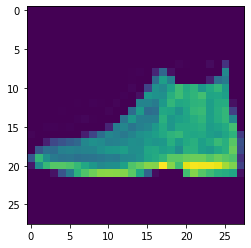

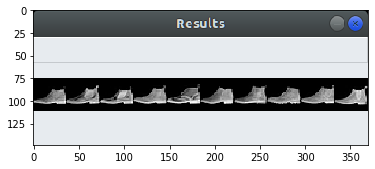

In [8]:
retrieve_closest_images(x_test[0], y_test[0])